## Import Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Collection and Analysis

In [143]:
# Load the dataset
medical_dataset = pd.read_csv("./Datasets/insurance.csv")
medical_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [144]:
# Shape of the dataset
medical_dataset.shape

(1338, 7)

In [145]:
# Basic information about the dataset
medical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [146]:
# Check missing values
medical_dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

####
####

In [147]:
# Statistical Measures
medical_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_24436\1403998680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_dataset["age"])


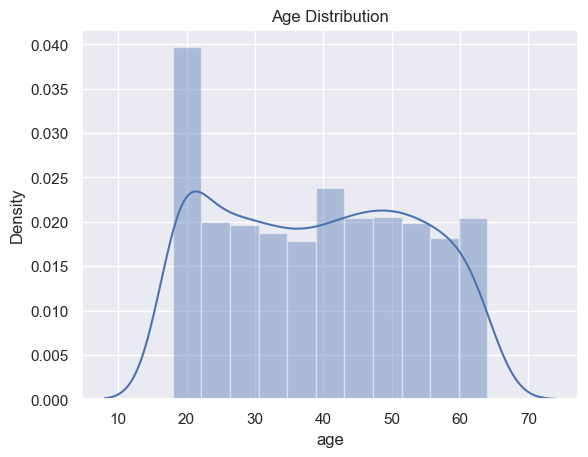

In [148]:
# Distribution of Age
sns.set()
sns.distplot(medical_dataset["age"])
plt.title("Age Distribution")
plt.show()

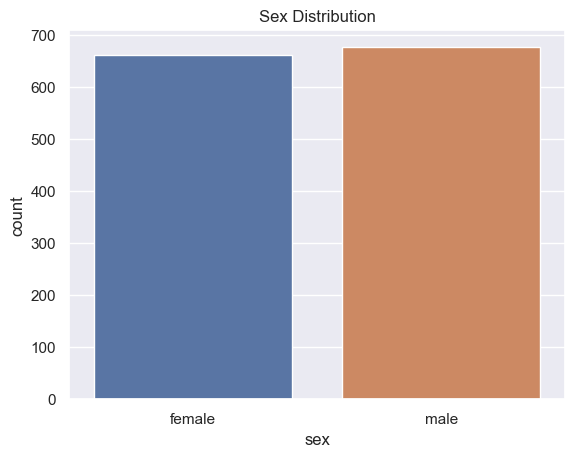

In [149]:
# Gender Column
sns.countplot(x="sex", data=medical_dataset)
plt.title("Sex Distribution")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24436\2277033429.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_dataset["bmi"])


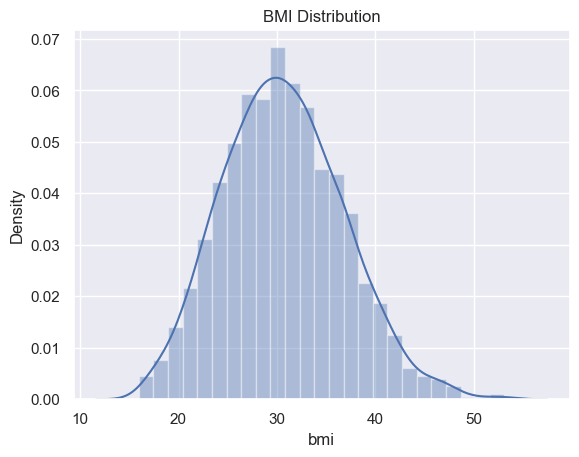

In [150]:
# BMI Distribution
sns.distplot(medical_dataset["bmi"])
plt.title("BMI Distribution")
plt.show()

### Normal BMI Range -> 18.5 to 24.9

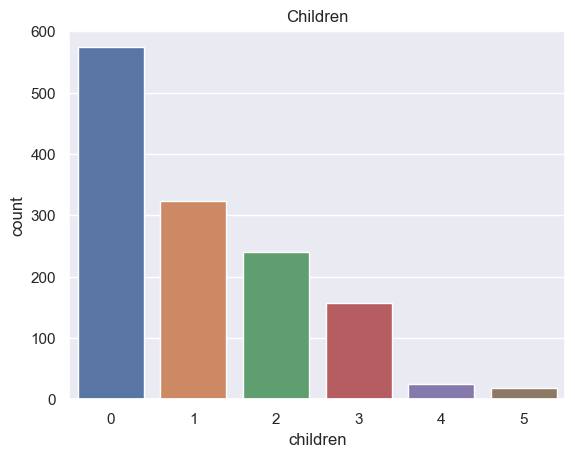

In [151]:
# Children Column
sns.countplot(x="children", data=medical_dataset)
plt.title("Children")
plt.show()

In [152]:
medical_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

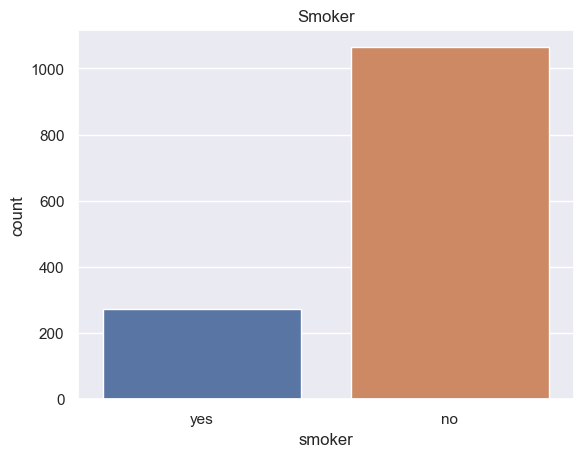

In [153]:
# Smoker Column
sns.countplot(x="smoker", data=medical_dataset)
plt.title("Smoker")
plt.show()

In [154]:
medical_dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

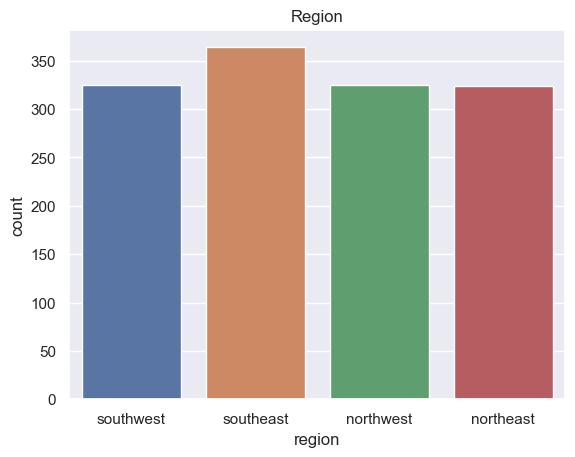

In [155]:
# Region Column
sns.countplot(x="region", data=medical_dataset)
plt.title("Region")
plt.show()

In [156]:
medical_dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_24436\1753635081.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_dataset["charges"])


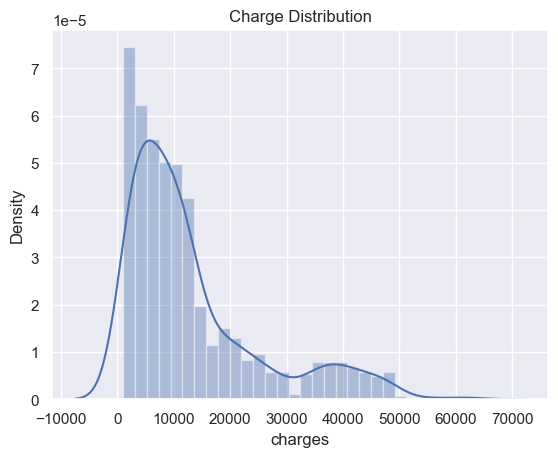

In [157]:
# Distribution of Chargges column
sns.distplot(medical_dataset["charges"])
plt.title("Charge Distribution")
plt.show()

## Data Preprocessing

In [158]:
# Convert categorical column to numerical
le = LabelEncoder()
medical_dataset = medical_dataset.apply(lambda x: le.fit_transform(x) if x.dtype == "object" else x)
medical_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Split tha dataset into features and target

In [159]:
x = medical_dataset.drop(columns=["charges"], axis=1)
y = medical_dataset["charges"]

### Split data into train and test

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Train

### Linear Regression

In [161]:
lr = LinearRegression()

In [162]:
lr.fit(x_train, y_train)

LinearRegression()

In [163]:
# prediction on training data
y_train_pred = lr.predict(x_train)

# R squared value
r2_train = r2_score(y_train, y_train_pred)
print("r2_score on trainig data: ", r2_train)

r2_score on trainig data:  0.7417049283233981


In [164]:
# prediction on training data
y_test_pred = lr.predict(x_test)

# R squared value
r2_test = r2_score(y_test, y_test_pred)
print("r2_score on testing data: ", r2_test)

r2_score on testing data:  0.7833463107364538


### Descision Tree Regressor

In [165]:
dt = DecisionTreeRegressor()

In [166]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [167]:
# prediction on training data
y_train_pred = dt.predict(x_train)

# R squared value
r2_train = r2_score(y_train, y_train_pred)
print("r2_score on trainig data: ", r2_train)

r2_score on trainig data:  0.9983078124756305


In [168]:
# prediction on training data
y_test_pred = dt.predict(x_test)

# R squared value
r2_test = r2_score(y_test, y_test_pred)
print("r2_score on testing data: ", r2_test)

r2_score on testing data:  0.7379677973421804


### XGBoost Regressor

In [169]:
xgb = XGBRegressor()

In [170]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [171]:
# prediction on training data
y_train_pred = xgb.predict(x_train)

# R squared value
r2_train = r2_score(y_train, y_train_pred)
print("r2_score on trainig data: ", r2_train)

r2_score on trainig data:  0.9941387967942534


In [172]:
# prediction on training data
y_test_pred = xgb.predict(x_test)

# R squared value
r2_test = r2_score(y_test, y_test_pred)
print("r2_score on testing data: ", r2_test)

r2_score on testing data:  0.8501678977480663


### Random Forest Regressor

In [173]:
rf = RandomForestRegressor()

In [174]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [175]:
# prediction on training data
y_train_pred = rf.predict(x_train)

# R squared value
r2_train = r2_score(y_train, y_train_pred)
print("r2_score on trainig data: ", r2_train)

r2_score on trainig data:  0.9745822590606878


In [176]:
# prediction on training data
y_test_pred = rf.predict(x_test)

# R squared value
r2_test = r2_score(y_test, y_test_pred)
print("r2_score on testing data: ", r2_test)

r2_score on testing data:  0.8634036030150652
